# Билет 1

## Задача 2

Используя библиотеку PyTorch, решите задачу регрессии. Разделите набор данных на обучающее и тестовое множество. Выполните предобработку данных. Отобразите графики значений функции потерь и метрики R2 на обучающем множестве. Рассчитайте значение метрики R2 на тестовом множестве.
Датасет: … (20 баллов)


ВНИМАНИЕ ! В РАЗНЫХ ДАТАСЕТАХ ПРИДЕТСЯ ПОМЕНЯТЬ НЕКОТОРЫЕ ДАННЫЕ (К ПРИМЕРУ ДЛЯ ГРАФИКОВ И ДЛЯ НЕЙРОНОК, НО ВСЁ КРАЙНЕ ПРОСТО И ПОНЯТНО)

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split
import torch.nn.functional as F
from torchmetrics import R2Score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import *



/Users/demg/conda_env/env/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/demg/conda_env/env/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE)
  Referenced from: '/Users/demg/conda_env/env/lib/python3.8/site-packages/torchvision/image.so'
  Expected in: '/Users/demg/conda_env/env/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib'
  warn(f"Failed to load image Python extension: {e}")


In [2]:
concrete = pd.read_csv("../data/regression/concrete.csv")
print(concrete.shape)
concrete.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
concrete.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64

In [5]:
concrete.isnull().sum().sum() 

0

In [6]:
concrete.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   strength                                         

In [7]:
#Видим, что у Age всего 14 уникальных значений. Чтобы "оптимизировать" датасет мы сделаем данную колонку категориальной
concrete.nunique()

Cement (component 1)(kg in a m^3 mixture)                278
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    185
Fly Ash (component 3)(kg in a m^3 mixture)               156
Water  (component 4)(kg in a m^3 mixture)                195
Superplasticizer (component 5)(kg in a m^3 mixture)      111
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     284
Fine Aggregate (component 7)(kg in a m^3 mixture)        302
Age (day)                                                 14
strength                                                 845
dtype: int64

In [8]:
concrete['Age (day)'] = concrete['Age (day)'].astype('category')

In [9]:
concrete.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64 
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64 
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64 
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64 
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64 
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64 
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64 
 7   Age (day)                                              1030 non-null   category
 8   strength                               

## Графики

Тут можете поиграться и посмотреть зависимости одной колонки от другой

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Age (day)'>

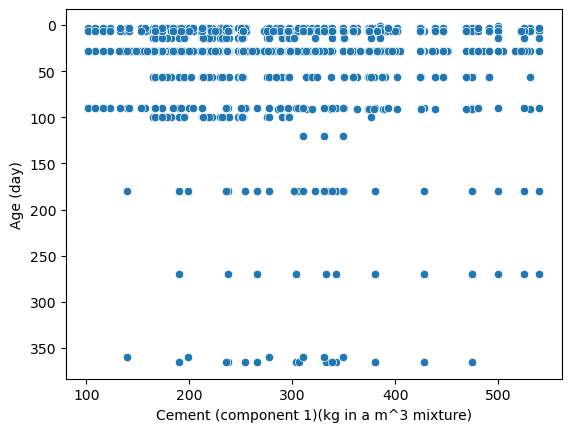

In [10]:
sns.scatterplot(x=concrete['Cement (component 1)(kg in a m^3 mixture)'],y=concrete['Age (day)'])

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Age (day)'>

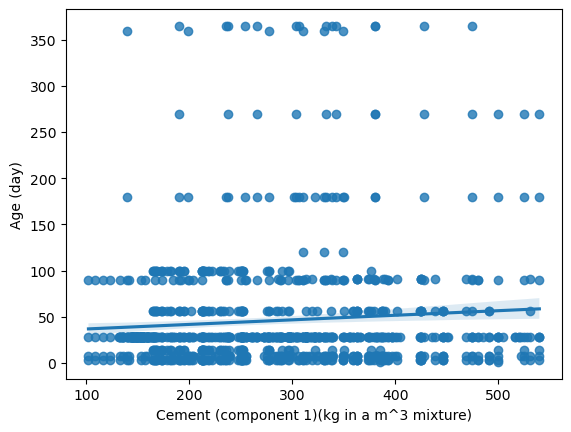

In [11]:
#Нет никакой регрессии 
sns.regplot(x=concrete['Cement (component 1)(kg in a m^3 mixture)'],y=concrete['Age (day)'])

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Age (day)'>

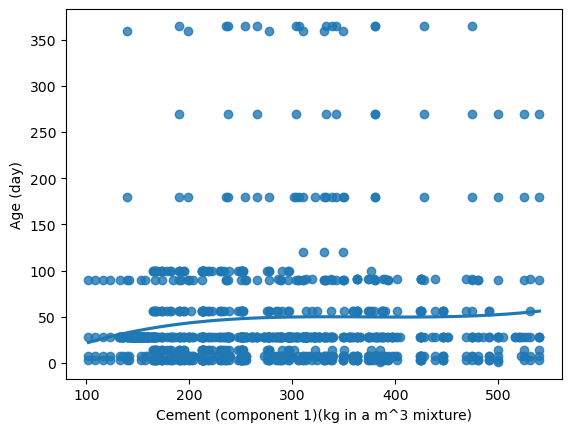

In [12]:
sns.regplot(x=concrete['Cement (component 1)(kg in a m^3 mixture)'],y=concrete['Age (day)'], data=concrete, order=3, ci=None)


## Регрессия Pytorch

In [13]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'strength'],
      dtype='object')

In [14]:
#СЮДА МОЖНО ВСТАВИТЬ ТО, ЧТО ИЩЕМ 
looking_for = 'Cement (component 1)(kg in a m^3 mixture)'

In [15]:
X = concrete.drop(labels=[looking_for], axis=1)
y = concrete[looking_for]


In [16]:
sscaler = preprocessing.StandardScaler()
sscaler.fit(X)
X_std= sscaler.transform(X)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=42)
X_train.shape

(721, 8)

!!! ОБРАЩАЙТЕ ВНИМАНИЕ НА КОММЕНТЫ В ЭТИХ МЕСТАХ

In [18]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],24) # Можете тут поиграться с кол-во слоёв
    self.layer2=nn.Linear(24,16)
    self.layer3=nn.Linear(16,8)
    self.layer4=nn.Linear(8,1)
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=F.relu(self.layer3(x))
    x=self.layer4(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=8, out_features=24, bias=True)
  (layer2): Linear(in_features=24, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=1, bias=True)
)


In [19]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.8569,  0.7240, -0.7481,  ...,  1.6512, -0.2797, -0.6048],
        [-0.8569, -0.8471,  0.1140,  ...,  0.1175, -0.6123, -1.0946],
        [ 1.6072, -0.8471, -1.2119,  ...,  1.3330, -0.6757, -0.6359],
        ...,
        [-0.8569,  1.1101, -0.7012,  ...,  0.3160,  0.8606, -0.1352],
        [ 0.5207, -0.8471, -0.0219,  ...,  0.0988, -0.2797,  1.9453],
        [-0.8569,  0.9194, -0.5419,  ...,  0.1175, -0.2797,  0.1582]],
       requires_grad=True)

In [20]:
#import torch.optim as optim
loss_fn=nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(),lr=0.0001) # Можете поиграться с lr 

In [21]:
epochs=1500 # И можете потрогать это значение
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%50==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:92483.5078125
epochs: 50......loss:58232.72265625
epochs: 100......loss:8932.154296875
epochs: 150......loss:8412.6767578125
epochs: 200......loss:6924.16015625
epochs: 250......loss:3504.2822265625
epochs: 300......loss:2413.47802734375
epochs: 350......loss:2193.674560546875
epochs: 400......loss:1965.1258544921875
epochs: 450......loss:1815.84326171875
epochs: 500......loss:1726.546630859375
epochs: 550......loss:1655.507568359375
epochs: 600......loss:1561.162109375
epochs: 650......loss:1516.02587890625
epochs: 700......loss:1476.4268798828125
epochs: 750......loss:1463.4117431640625
epochs: 800......loss:1449.6444091796875
epochs: 850......loss:1398.432373046875
epochs: 900......loss:1338.038818359375
epochs: 950......loss:1303.6353759765625
epochs: 1000......loss:1263.82666015625
epochs: 1050......loss:1220.6505126953125
epochs: 1100......loss:1186.0579833984375
epochs: 1150......loss:1146.269775390625
epochs: 1200......loss:1131.2890625
epochs: 1250......los

In [22]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [23]:
from sklearn.metrics import r2_score

test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.91402465279445
0.9000038486772199


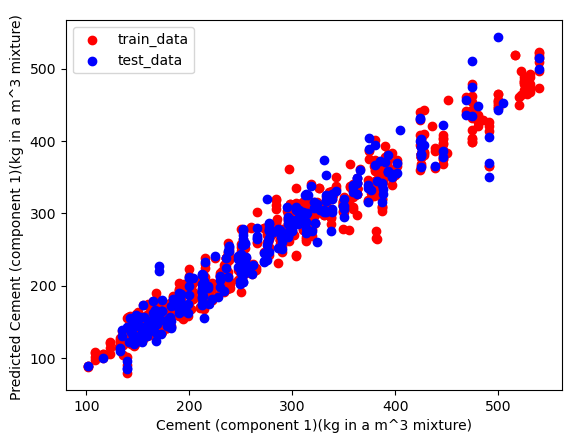

In [24]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

# 3 Задание

При помощи возможностей по автоматическому дифференцированию, которые предоставляет библиотека PyTorch, найдите минимум функции y=ln⁡(x2+10x+10) на отрезке [-10, 10]. Реализуйте процесс поиска экстремума таким образом, чтобы при нахождении точки экстремума процедура поиска останавливалась. Продемонстрируйте процесс оптимизации. Изобразите график функции y(x) на заданном отрезке. (20 баллов)

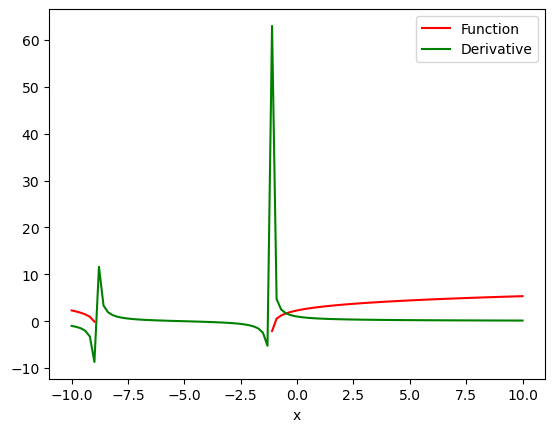

In [25]:
import math
x = torch.linspace(-10, 10, 100, requires_grad = True)
Y = torch.log(x**2 + 10*x + 10)
y = torch.sum(Y)
y.backward()
 
# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

In [26]:
import torch.optim as optim

parameters = [x]  # This should be the list of model parameters
optimizer = optim.Adam(parameters, lr=0.01)


In [27]:
def func_2d(x):
    return torch.log(x**2 + 10*x + 10)

In [28]:
!wget -q https://raw.githubusercontent.com/theevann/amld-pytorch-workshop/master/live_plot.py -O live_plot.py
!pip install -q ipympl

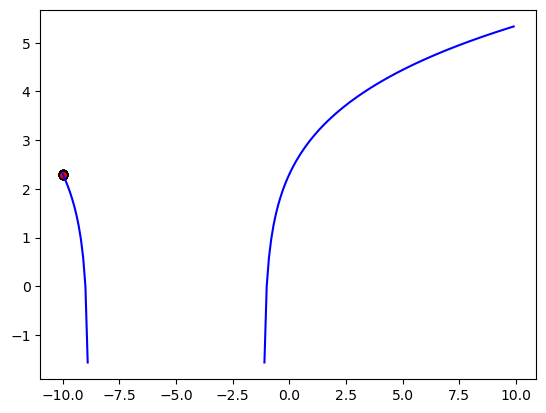

In [29]:
from live_plot import anim_2d

x0 = -10
lr = 0.001
iterations = 15
points= []

x_range = torch.arange(-10, 10, 0.1)
x = torch.Tensor([x0]).requires_grad_()

optimizer = torch.optim.Adam([x], lr=lr)
mini = 50
for i in range(iterations):
    optimizer.zero_grad()
    f = func_2d(x)
    f.backward()
    points += [(x.item(), f.item())]
    if (f.item()<mini):
        mini=f.item()
    elif (f.item()>mini):
        break
    optimizer.step()
    
anim_2d(x_range, func_2d, points, 1000)

# 3 задача Наиболее правильное решение

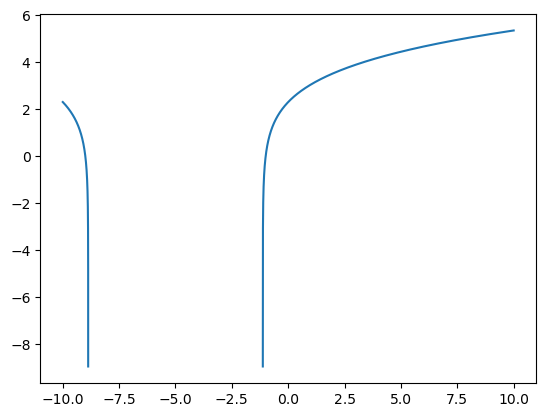

In [30]:
def f(x: torch.Tensor) -> torch.Tensor:
    return torch.log(x ** 2 + 10 * x + 10)


SIGN = -1  # 1 - max, -1 - min

START, END = -10, 10
EPS = 0.0000001
LR = 0.00005

X = torch.arange(START, END + 0.001, 0.001)
Y = f(X)
plt.plot(X.detach(), Y.detach());